In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

In [ ]:
"""
Zadanie 1:
Proszę o pobranie danych ze źródła:
https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
i wykonanie następujących działań:

1. Wczytanie danych.
2. EDA (Exploratory Data Analysis):
	2.1. Utworzenie wykresu punktowego 'Milk' vs 'Grocery', gdzie punkty będą różnicowane za pomocą kolumny 'Channel'.
	2.2. Utworzenie histogramu wydatków na mleko na podstawie kolumny 'Channel'.
	2.3. Utworzenie mapy skupień korelacji między wydatkami na różne kategorie.
	2.4. Utworzenie wykresu porównawczgo składającego się z macierzy par wszystkich zmiennych, różnicowanych na podstawie kolumny 'Region'.
	2.5. Przeprowadzenie standaryzacji danych na kolumnach z wyłączeniem kolumny Channel i Region.  
	2.6. Użycie DBSCAN i pętli for, aby utworzyć różne modele testujące różne wartości epsilon, a minimalna liczba punktów w odległości epsilon to 2*scaled_X.shape[1]. W pętli należy śledzić i rejestrować odsetek punktów, które stanowią wartości odstające. Dla porównania, rozwiązania do testowania wykorzystują następujący zakres wartości epsilon: np.linspace(0.001,3,50).
	2.7. Utworzenie wykresu liniowego procentu punktów odstających w funkcji wybranej wartości epsilon.
	2.8. W oparciu o wykres utworzony w poprzednim zadaniu (2.6) przeszkolić model DBSCAN z odpowiednią wartością epsilon, przy czym eps nie może przyjmować wartości 2.
	2.9. Utworzenie wykresu punktowego 'Milk' vs 'Grocery', gdzie punkty będą różnicowane za pomocą etykiet dbscan.
	2.10. Utworzenie wykresu punktowego 'Milk' vs 'Detergents Paper', gdzie punkty będą różnicowane za pomocą etykiet dbscan.
	2.11. Utwórzyć nową kolumnę o nazwie "Labels".
	2.12. Usunąć kolumny 'Channel' i 'Region' , a następnie porównać średnią skupień i wartości odstających dla kwot wydatków w poszczególnych kategoriach.
"""

In [3]:
data = pd.read_csv('./Wholesale customers data.csv')

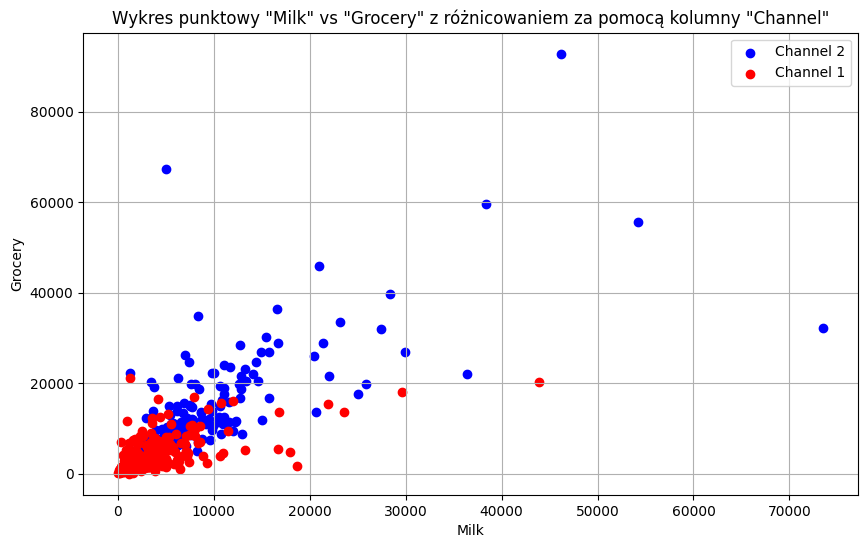

In [4]:
#2.1
plt.figure(figsize=(10, 6))
colors = ['blue', 'red']  # Kolory dla dwóch kanałów (możesz dostosować je według swojego wyboru)
channels = data['Channel'].unique()

for channel, color in zip(channels, colors):
    channel_data = data[data['Channel'] == channel]
    plt.scatter(channel_data['Milk'], channel_data['Grocery'], label=f'Channel {channel}', c=color)

plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.legend()
plt.title('Wykres punktowy "Milk" vs "Grocery" z różnicowaniem za pomocą kolumny "Channel"')
plt.grid(True)

plt.show()

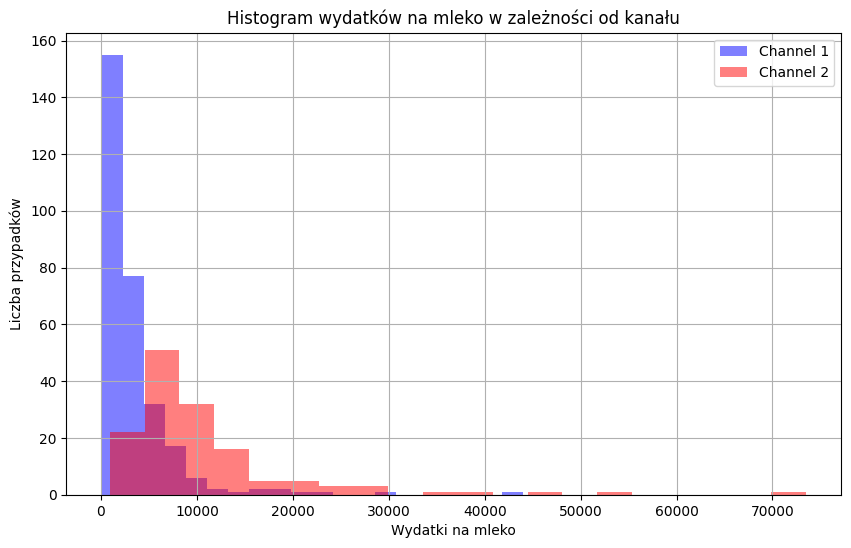

In [5]:
#2.2. Utworzenie histogramu wydatków na mleko na podstawie kolumny 'Channel'.

channel_1_data = data[data['Channel'] == 1]
channel_2_data = data[data['Channel'] == 2]

plt.figure(figsize=(10, 6))
plt.hist(channel_1_data['Milk'], bins=20, alpha=0.5, label='Channel 1', color='blue')
plt.hist(channel_2_data['Milk'], bins=20, alpha=0.5, label='Channel 2', color='red')

plt.xlabel('Wydatki na mleko')
plt.ylabel('Liczba przypadków')
plt.legend()
plt.title('Histogram wydatków na mleko w zależności od kanału')
plt.grid(True)

plt.show()

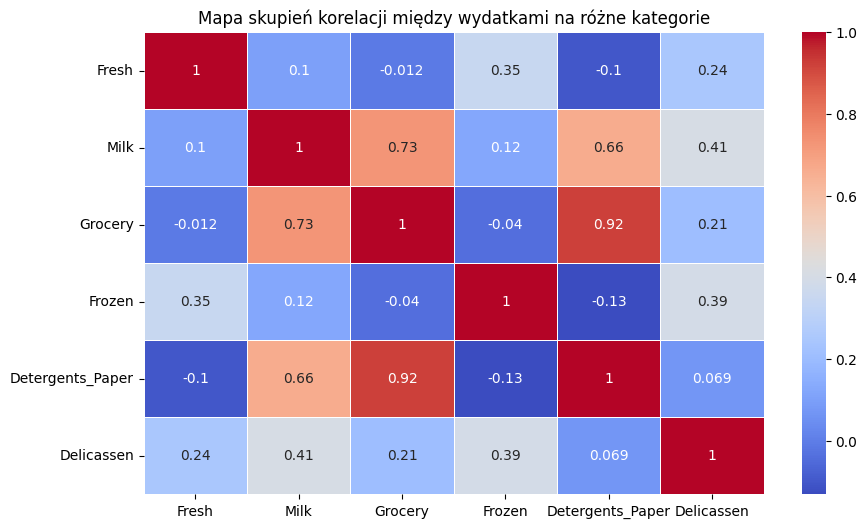

In [6]:
#2.3.
# Wybieramy kolumny od trzeciej (Milk) do ostatniej

expenses_data = data.iloc[:, 2:]  
correlation_matrix = expenses_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa skupień korelacji między wydatkami na różne kategorie')
plt.show()

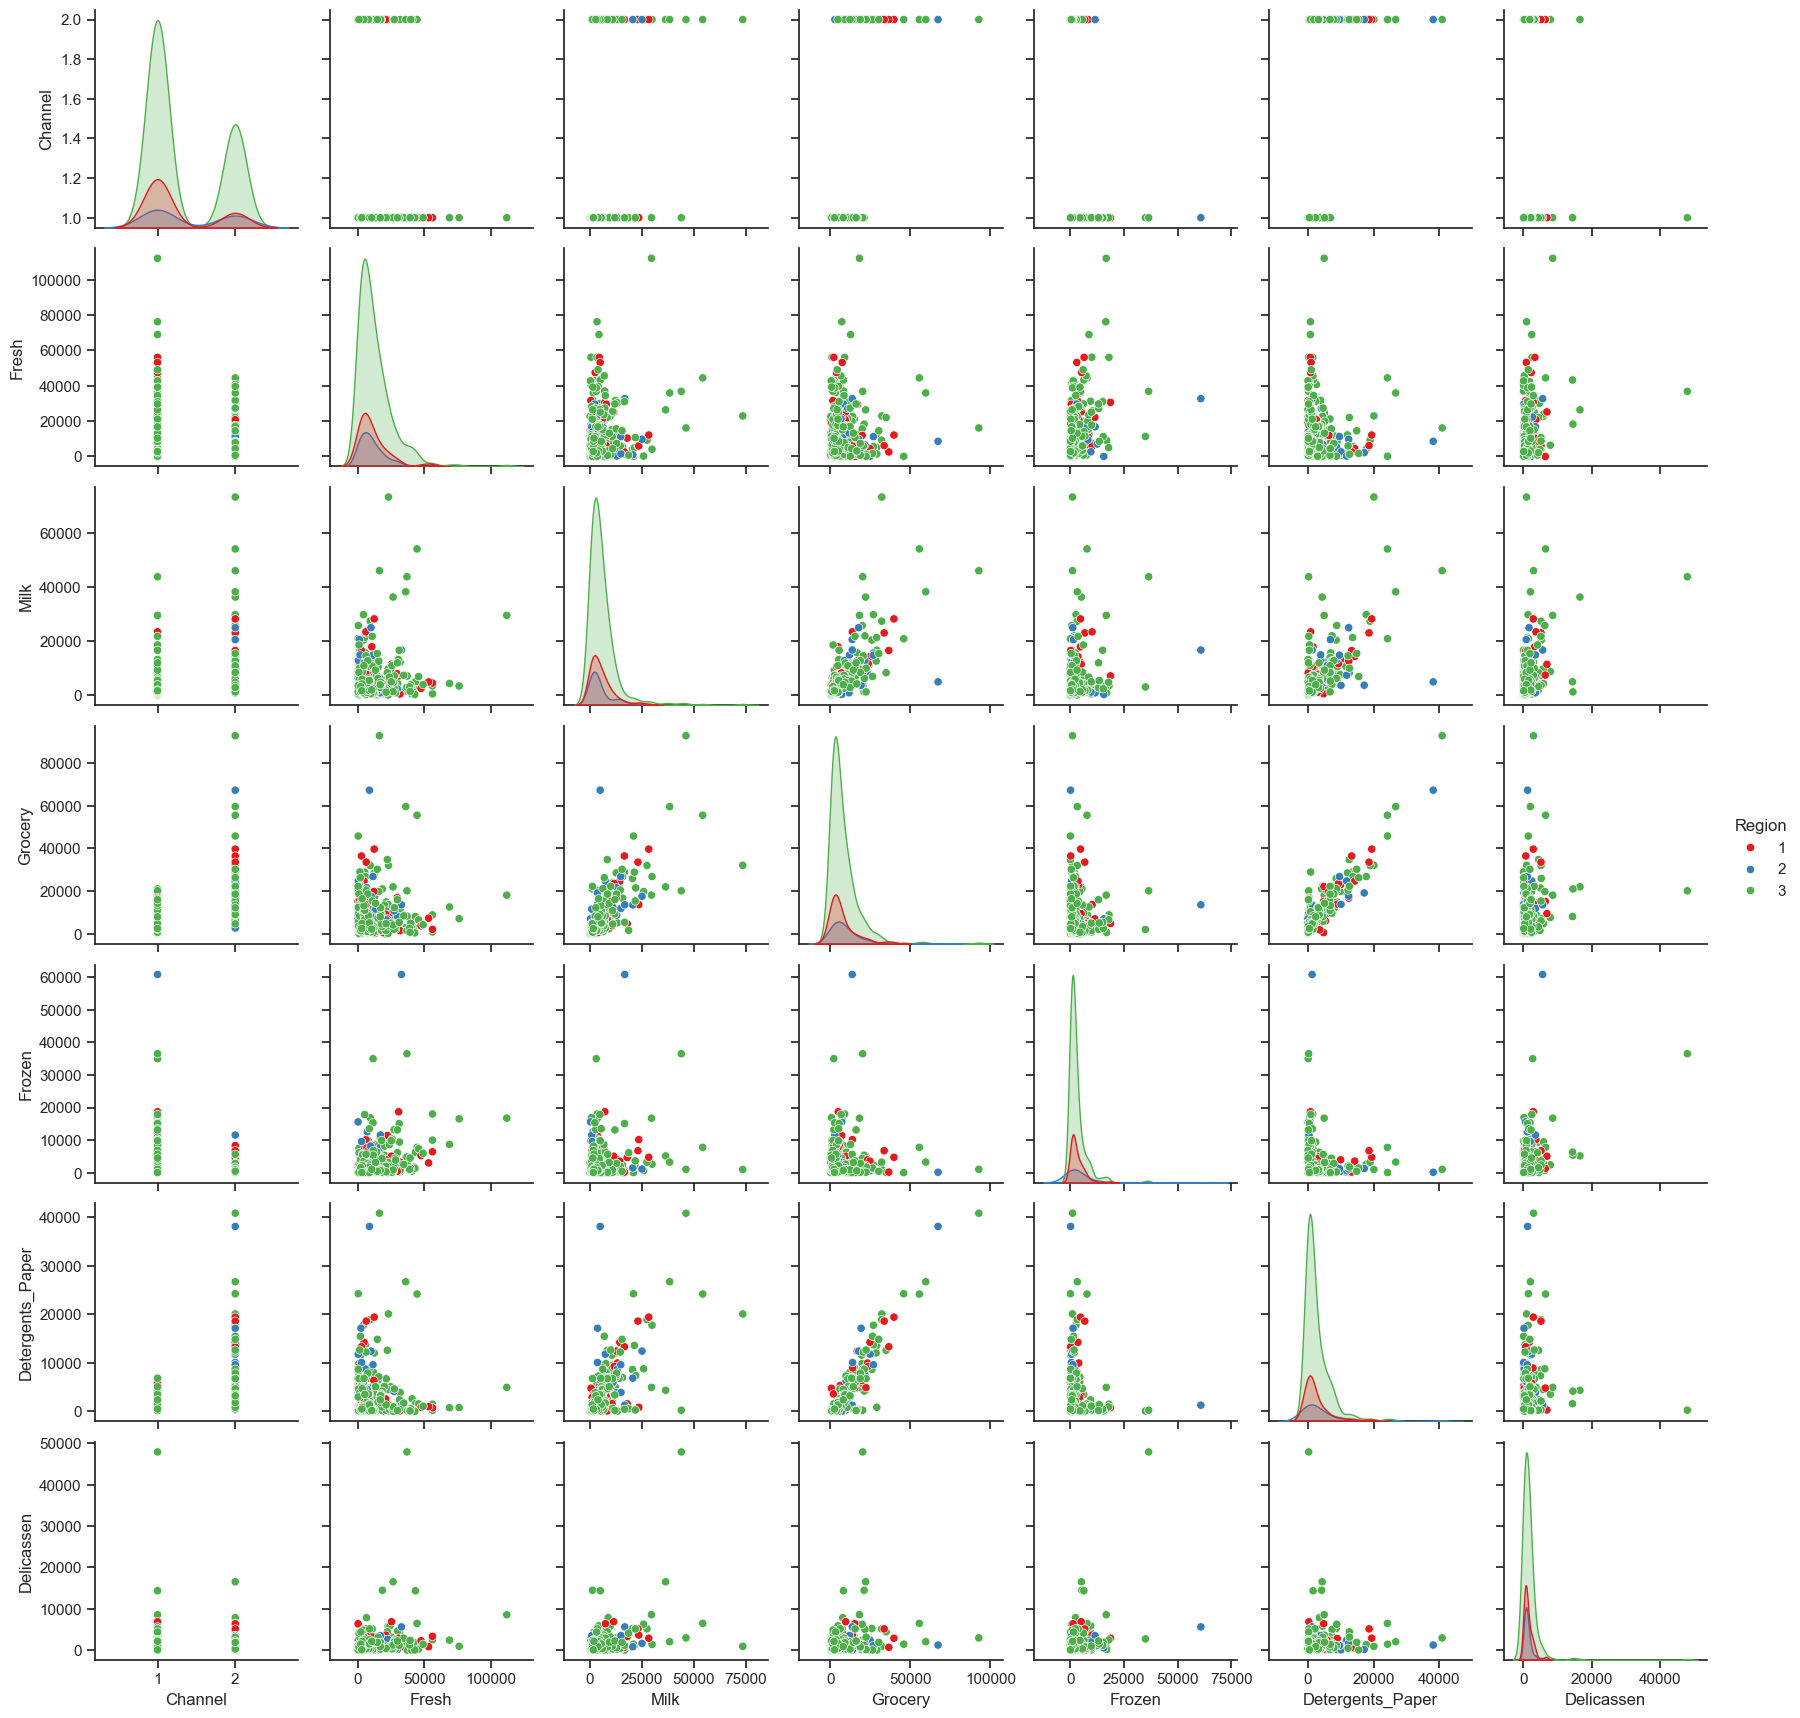

In [7]:
#2.4
sns.set(style="ticks")
sns.pairplot(data, hue="Region", palette="Set1")
plt.show()

In [10]:
columns_to_standardize = [col for col in data.columns if col not in ['Channel', 'Region']]

# Inicjalizuj obiekt StandardScaler
scaler = StandardScaler()

# Przeprowadź standaryzację wybranych kolumn
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# Teraz dane w kolumnach 'Milk', 'Grocery', itd. zostały standaryzowane (średnia = 0, odchylenie standardowe = 1)

In [12]:
# 2.6. Użycie DBSCAN i pętli for, aby utworzyć różne modele testujące różne wartości epsilon, 
# a minimalna liczba punktów w odległości epsilon to 2*scaled_X.shape[1]. 
# W pętli należy śledzić i rejestrować odsetek punktów, które stanowią wartości odstające. 
# Dla porównania, rozwiązania do testowania wykorzystują następujący zakres wartości epsilon: np.linspace(0.001,3,50).

# Wybierz kolumny do analizy (wyklucz 'Channel' i 'Region')
columns_to_analyze = [col for col in data.columns if col not in ['Channel', 'Region']]

# Inicjalizuj obiekt StandardScaler
scaler = StandardScaler()

# Standaryzuj wybrane kolumny
scaled_data = scaler.fit_transform(data[columns_to_analyze])

# Zakres wartości epsilon do testowania
epsilons = np.linspace(0.001, 3, 50)

# Ilość punktów w odległości epsilon
min_samples = 2 * scaled_data.shape[1]

outlier_percentages = []

for epsilon in epsilons:
    # Inicjalizuj model DBSCAN z bieżącą wartością epsilon
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

    # Przydziel klastry i identyfikuj punkty odstające
    cluster_labels = dbscan.fit_predict(scaled_data)

    # Zlicz punkty odstające
    n_outliers = len(cluster_labels[cluster_labels == -1])
    
    # Oblicz odsetek punktów odstających
    percentage_outliers = (n_outliers / len(scaled_data)) * 100

    # Dodaj wynik do listy
    outlier_percentages.append(percentage_outliers)

# Teraz masz listę odsetków punktów odstających dla różnych wartości epsilon
# Możesz je wykorzystać do analizy wyników i wyboru optymalnego epsilon.

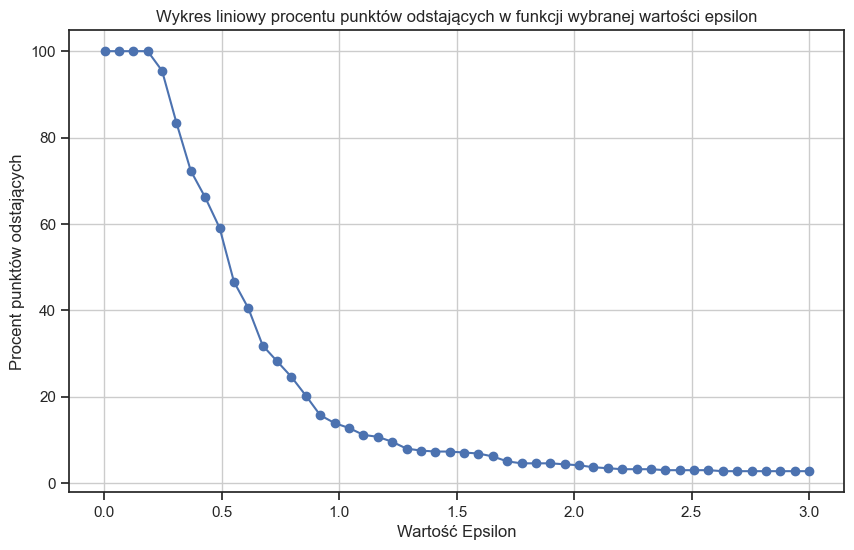

In [13]:
# Wybierz kolumny do analizy (wyklucz 'Channel' i 'Region')
columns_to_analyze = [col for col in data.columns if col not in ['Channel', 'Region']]

# Inicjalizuj obiekt StandardScaler
scaler = StandardScaler()

# Standaryzuj wybrane kolumny
scaled_data = scaler.fit_transform(data[columns_to_analyze])

# Zakres wartości epsilon do testowania
epsilons = np.linspace(0.001, 3, 50)

# Ilość punktów w odległości epsilon
min_samples = 2 * scaled_data.shape[1]

outlier_percentages = []

for epsilon in epsilons:
    # Inicjalizuj model DBSCAN z bieżącą wartością epsilon
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

    # Przydziel klastry i identyfikuj punkty odstające
    cluster_labels = dbscan.fit_predict(scaled_data)

    # Zlicz punkty odstające
    n_outliers = len(cluster_labels[cluster_labels == -1])
    
    # Oblicz odsetek punktów odstających
    percentage_outliers = (n_outliers / len(scaled_data)) * 100

    # Dodaj wynik do listy
    outlier_percentages.append(percentage_outliers)

# Utwórz wykres liniowy
plt.figure(figsize=(10, 6))
plt.plot(epsilons, outlier_percentages, marker='o', linestyle='-')
plt.xlabel('Wartość Epsilon')
plt.ylabel('Procent punktów odstających')
plt.title('Wykres liniowy procentu punktów odstających w funkcji wybranej wartości epsilon')
plt.grid(True)
plt.show()

In [14]:
# 2.8. W oparciu o wykres utworzony w poprzednim zadaniu (2.6) 
# przeszkolić model DBSCAN z odpowiednią wartością epsilon, przy czym eps nie może przyjmować wartości 2.

# Wybierz kolumny do analizy (wyklucz 'Channel' i 'Region')
columns_to_analyze = [col for col in data.columns if col not in ['Channel', 'Region']]

# Inicjalizuj obiekt StandardScaler
scaler = StandardScaler()

# Standaryzuj wybrane kolumny
scaled_data = scaler.fit_transform(data[columns_to_analyze])

# Wybierz optymalną wartość epsilon z wykresu 2.6 (np. epsilon = 1.5)
epsilon = 1.5

# Ilość punktów w odległości epsilon
min_samples = 2 * scaled_data.shape[1]

# Inicjalizuj model DBSCAN z wybraną wartością epsilon
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Przydziel klastry i identyfikuj punkty odstające
cluster_labels = dbscan.fit_predict(scaled_data)

# Teraz model DBSCAN został przeszkolony z wybraną wartością epsilon (1.5)
# Klastry i punkty odstające zostały przypisane do danych.

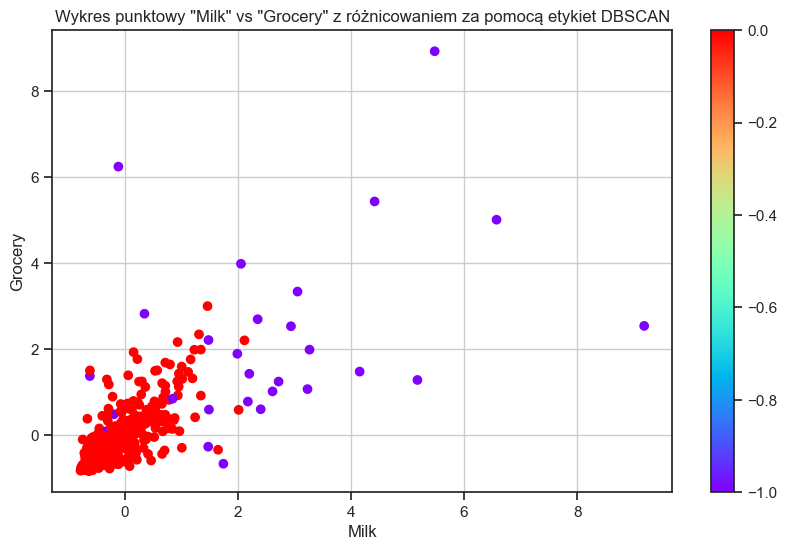

In [15]:
#2.9. Utworzenie wykresu punktowego 'Milk' vs 'Grocery', gdzie punkty będą różnicowane za pomocą etykiet dbscan.

# Wybierz kolumny do analizy (wyklucz 'Channel' i 'Region')
columns_to_analyze = [col for col in data.columns if col not in ['Channel', 'Region']]

# Inicjalizuj obiekt StandardScaler
scaler = StandardScaler()

# Standaryzuj wybrane kolumny
scaled_data = scaler.fit_transform(data[columns_to_analyze])

# Wybierz optymalną wartość epsilon z wykresu 2.6 (np. epsilon = 1.5)
epsilon = 1.5

# Ilość punktów w odległości epsilon
min_samples = 2 * scaled_data.shape[1]

# Inicjalizuj model DBSCAN z wybraną wartością epsilon
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Przydziel klastry i identyfikuj punkty odstające
cluster_labels = dbscan.fit_predict(scaled_data)

# Utwórz wykres punktowy 'Milk' vs 'Grocery' z różnicowaniem za pomocą etykiet DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(data['Milk'], data['Grocery'], c=cluster_labels, cmap='rainbow')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Wykres punktowy "Milk" vs "Grocery" z różnicowaniem za pomocą etykiet DBSCAN')
plt.grid(True)
plt.colorbar()
plt.show()

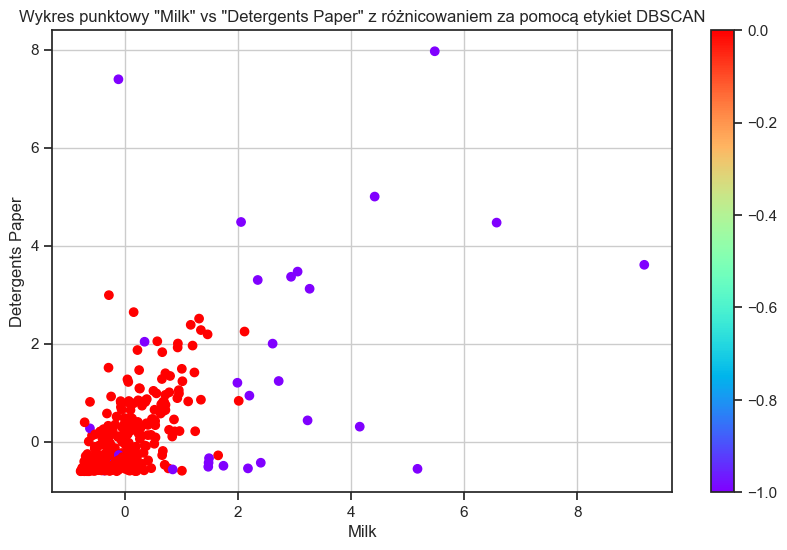

In [17]:
#2.10. Utworzenie wykresu punktowego 'Milk' vs 'Detergents Paper', gdzie punkty będą różnicowane za pomocą etykiet dbscan.

# Wybierz kolumny do analizy (wyklucz 'Channel' i 'Region')
columns_to_analyze = [col for col in data.columns if col not in ['Channel', 'Region']]

# Inicjalizuj obiekt StandardScaler
scaler = StandardScaler()

# Standaryzuj wybrane kolumny
scaled_data = scaler.fit_transform(data[columns_to_analyze])

# Wybierz optymalną wartość epsilon z wykresu 2.6 (np. epsilon = 1.5)
epsilon = 1.5

# Ilość punktów w odległości epsilon
min_samples = 2 * scaled_data.shape[1]

# Inicjalizuj model DBSCAN z wybraną wartością epsilon
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Przydziel klastry i identyfikuj punkty odstające
cluster_labels = dbscan.fit_predict(scaled_data)

# Utwórz wykres punktowy 'Milk' vs 'Detergents Paper' z różnicowaniem za pomocą etykiet DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(data['Milk'], data['Detergents_Paper'], c=cluster_labels, cmap='rainbow')
plt.xlabel('Milk')
plt.ylabel('Detergents Paper')
plt.title('Wykres punktowy "Milk" vs "Detergents Paper" z różnicowaniem za pomocą etykiet DBSCAN')
plt.grid(True)
plt.colorbar()
plt.show()

In [18]:
#2.11. Utwórzyć nową kolumnę o nazwie "Labels".

data['Labels'] = cluster_labels

In [19]:
# 2.12. Usunąć kolumny 'Channel' i 'Region' , a następnie porównać średnią skupień i wartości odstających dla kwot wydatków w poszczególnych kategoriach.

# Usuń kolumny 'Channel' i 'Region'
data = data.drop(['Channel', 'Region'], axis=1)

# Inicjalizuj obiekt StandardScaler
scaler = StandardScaler()

# Standaryzuj dane
scaled_data = scaler.fit_transform(data)

# Wybierz optymalną wartość epsilon z wykresu 2.6 (np. epsilon = 1.5)
epsilon = 1.5

# Ilość punktów w odległości epsilon
min_samples = 2 * scaled_data.shape[1]

# Inicjalizuj model DBSCAN z wybraną wartością epsilon
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Przydziel klastry i identyfikuj punkty odstające
cluster_labels = dbscan.fit_predict(scaled_data)

# Dodaj etykiety klastrów do danych
data['Labels'] = cluster_labels

# Grupowanie danych według etykiet klastrów
grouped_data = data.groupby('Labels')

# Oblicz średnią dla każdej kategorii wydatków w każdym klastrze
average_expenses_by_cluster = grouped_data.mean()

# Oblicz liczbę punktów odstających w każdym klastrze
outliers_by_cluster = grouped_data['Labels'].count() - grouped_data.size()

# Wyniki
print("Średnie wydatki w każdym klastrze:")
print(average_expenses_by_cluster)

print("\nLiczba punktów odstających w każdym klastrze:")
print(outliers_by_cluster)

Średnie wydatki w każdym klastrze:
           Fresh     Milk   Grocery    Frozen  Detergents_Paper  Delicassen
Labels                                                                     
-1      0.941903  2.22233  1.925375  1.264945          1.615024    1.502806
 0     -0.073875 -0.17430 -0.151010 -0.099211         -0.126669   -0.117867

Liczba punktów odstających w każdym klastrze:
Labels
-1    0
 0    0
dtype: int64


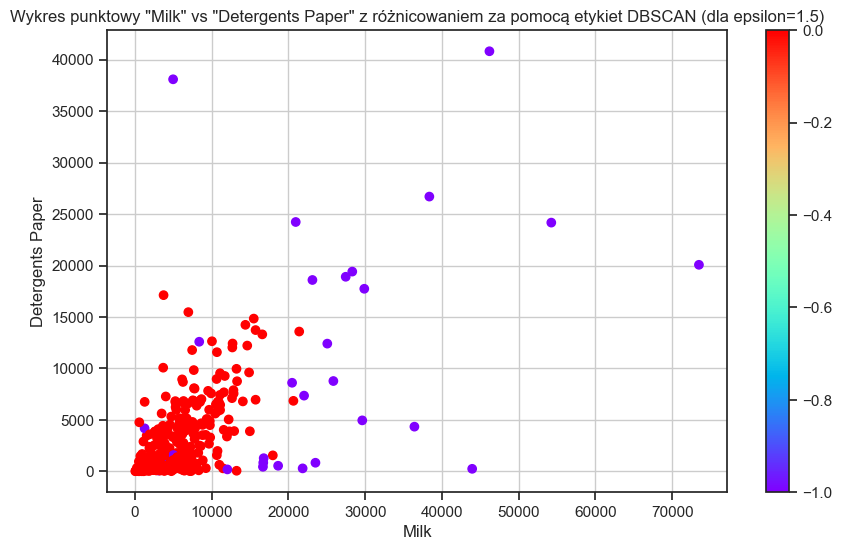

In [20]:
"""
Zadanie 2:
Zastosowanie algorytmu DBSCAN do danych znormalizowanych w zakresie [0,1] (punkty 2.5 - 2.12), dla założonej w zadaniu 2.8 wartości epsilon.
"""
# Wczytaj dane
data = pd.read_csv('./Wholesale customers data.csv')

# Wybierz kolumny do analizy (wyklucz 'Channel' i 'Region')
columns_to_analyze = [col for col in data.columns if col not in ['Channel', 'Region']]

# Inicjalizuj obiekt StandardScaler
scaler = StandardScaler()

# Standaryzuj wybrane kolumny
scaled_data = scaler.fit_transform(data[columns_to_analyze])

# Zdefiniuj wartość epsilon na podstawie zadania 2.8 (np. epsilon = 1.5)
epsilon = 1.5

# Ilość punktów w odległości epsilon
min_samples = 2 * scaled_data.shape[1]

# Inicjalizuj model DBSCAN z wybraną wartością epsilon
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Przydziel klastry i identyfikuj punkty odstające
cluster_labels = dbscan.fit_predict(scaled_data)

# Utwórz wykres punktowy 'Milk' vs 'Detergents Paper' z różnicowaniem za pomocą etykiet DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(data['Milk'], data['Detergents_Paper'], c=cluster_labels, cmap='rainbow')
plt.xlabel('Milk')
plt.ylabel('Detergents Paper')
plt.title('Wykres punktowy "Milk" vs "Detergents Paper" z różnicowaniem za pomocą etykiet DBSCAN (dla epsilon=1.5)')
plt.grid(True)
plt.colorbar()
plt.show()

In [1]:
"""
Zadanie 3:
Proszę o pobranie zdjęcia (palm_tree.jpg, źródło: https://www.pexels.com/photo/silhouette-of-palm-trees-near-shoreline-461940/)
i wykonanie następujących działań:

	3.1. Wczytanie danych.
	3.2. Wyświetlenie kodów RGB dla każdego piksela.
	3.3. Wyświetlenie zdjęcia.
	3.4. Kwantyzacja liczby kolorów metodą k-średnich.
	 	Wyświetlenie rozmiarów zdjęcia i 3 wymiaru -> inf. nt. kolorów.
		Konwersja danych z 3D do 2D. Algorytm k-średnich jest przeznaczony do uczenia danych 2D (wierszy danych i kolumn cech), można zmienić kształt za pomocą (w,h,c) ---> (w * h,c).
		Zastosowanie metody k-średnich dla liczby skupień równej 6.
		Wyświetlenie etykiet.
		Wyświetlenie informacji nt. centroidów.
		Stworzenie zmiennej, w której współrzędne centroidów będą zaokrąglone do 0 miejsc po przecinku.
		Stworzenie skwantyzowanego obrazu.
		Wyświetlenie obrazu po kwantyzacji.
"""

from PIL import Image

#wczytanie danych
image_path = './palm_tree.jpg'
image = Image.open(image_path)

#ekstrakcja wymiarów obrazka
width, height = image.size

#ekstrakcja kodu rgb każdego piksela na wczytanym zdjęciu do lisrt rgb_by_pixel
rgb_by_pixel = []
for y in range(height):
    for x in range(width):
        rgb_values = image.getpixel((x,y))
        rgb_by_pixel.append(rgb_values)

In [2]:
#wyświetlenie zdjęcia
image.show()

In [6]:
#przykładowa krotka z kodem rgb dla pierwszego pixela ze zdjęcia
rgb_by_pixel[0]

(41, 44, 95)

In [3]:
#Kwantyzacja liczby kolorów metodą K-Means

#wyświetlenie rozmiarów zdjęcia oraz 3 wymiaru (info nt. kolorów)
width, height = image.size
channels = len(image.getbands())

print(f'Wymiary zdjęcia: {width} x {height}')
print(f'Liczba kanałów kolorów: {channels}')

Wymiary zdjęcia: 6000 x 3845
Liczba kanałów kolorów: 3


In [6]:
#Konwersja danych z 3D do 2D. Algorytm k-średnich jest przeznaczony do uczenia danych 2D (wierszy danych i kolumn cech), można zmienić kształt za pomocą (w,h,c) ---> (w * h,c).

import numpy as np
from sklearn.cluster import KMeans

#konwersja z trójwymiaru do dwuwymiaru
image_array = np.array(image)
image_2d = image_array.reshape((width * height, channels))

#zastosowanie metody k-means dla 6 skupień
kmeans = KMeans(n_clusters=6)
kmeans.fit(image_2d)

c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [7]:
#wyświetlenie etykiet
labels = kmeans.labels_
labels

array([2, 2, 2, ..., 0, 0, 0])

In [8]:
#wyświetlenie informacji o centroidach
centroids = kmeans.cluster_centers_
centroids

array([[  9.8623291 ,   3.53553606,   9.49096747],
       [176.94478368, 154.48641049, 173.64313861],
       [ 65.99963231,  76.33735545, 131.53191094],
       [240.55936183, 146.07031046, 124.17701892],
       [109.90928546, 114.81490259, 162.53140332],
       [159.36198666,  99.54133936, 102.43254344]])

In [11]:
#zaokrąglenie współrzędnych centroidów do liczb całkowitych
int_centroids = np.round(centroids).astype(int)
int_centroids

array([[ 10,   4,   9],
       [177, 154, 174],
       [ 66,  76, 132],
       [241, 146, 124],
       [110, 115, 163],
       [159, 100, 102]])

In [12]:
#Stworzenie skwantyzowanego obrazu
quantized_image_2d = int_centroids[labels]
quantized_image_2d

array([[ 66,  76, 132],
       [ 66,  76, 132],
       [ 66,  76, 132],
       ...,
       [ 10,   4,   9],
       [ 10,   4,   9],
       [ 10,   4,   9]])

In [16]:
#wyświetlenie obrazu po kwantyzacji

#przywrócenie trójwymiarowego kształtu
quantized_image_3d = quantized_image_2d.reshape((height, width, channels))
quantized_image = Image.fromarray(np.uint8(quantized_image_3d))

quantized_image.show()
image.save('images/original_image.png')
quantized_image.save('images/quantized_image.png')

In [ ]:
"""
Zadanie 4:
Proszę o pobranie danych ze źródła:
https://archive.ics.uci.edu/dataset/9/auto+mpg
zapoznanie się ze zbiorem danych, wczytanie danych, wczytanie nazw kolumn i wykonanie następujących działań:

4.1. Sprawdzenie kompletności danych (np. czy nie ma brakujących danych), jeżeli brakuje jakiś danych, to usunąć niekompletne obiekty.
4.2. Podanie informacji na temat ilość samochodów, które zostały wyprodukowane w poszczególnych krajach lub kontynentach.
4.3. Stworzenie nowej ramki danych (bez kolumny 'name'), zawierającej zmienne fikcyjne (dummy variables) odnoszące się do obszaru pochodzenia.
4.4. Przeprowadzenie normalizacji w zakresie [0,1] na danych.
4.5. Stworzenie heatmapy na podstawie znormalizowanych danych.
4.6. Stowrzenie clustermapy na podstawie znormalizowanych danych.
4.7. Zastosowanie grupowanie hierarchicznego aglomeracyjnego, dla 4 skupień. 
4.8. Wyświetlenie etykiet.
4.9. Utworzenie wykresu punktowego na danych oryginalnych 'mpg' vs 'weight', gdzie punkty będą różnicowane za pomocą etykiet uzyskanych za pomocą grupowania.
"""

In [9]:
df = pd.read_csv('./auto+mpg/auto-mpg.data')

In [10]:
df

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
...,...
392,27.0 4 140.0 86.00 2790. 15...
393,44.0 4 97.00 52.00 2130. 24...
394,32.0 4 135.0 84.00 2295. 11...
395,28.0 4 120.0 79.00 2625. 18...


In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

18.0   8   307.0      130.0      3504.      12.0   70  1\t"chevrolet chevelle malibu"    0
dtype: int64

In [8]:
df

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
...,...
392,27.0 4 140.0 86.00 2790. 15...
393,44.0 4 97.00 52.00 2130. 24...
394,32.0 4 135.0 84.00 2295. 11...
395,28.0 4 120.0 79.00 2625. 18...
